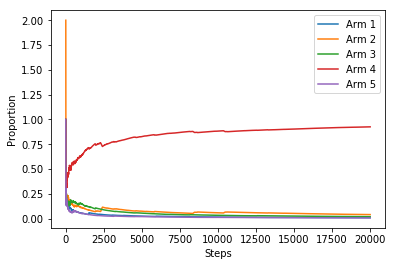

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

#number of arms
K = 5

#num of rounds
rounds = 20000

#sum till now
S = []

#times picked till now
N = []

#define p values for all arms
p = [0.4, 0.6, 0.5, 0.7, 0.3]

def ucb_value(t):

    v_temp = []
    
    for k in range(0, K):
        v = (S[k]/N[k]) + math.sqrt(2*(math.log(t))/N[k])
        v_temp.append(v)

    max_i = 0
    max_value = v_temp[0]

    for i in range(0, K):
        if v_temp[i] > max_value:
            max_value = v_temp[i]
            max_i = i

    return max_i

def reward(k):

    #assume underlying bernoulli distribution
    return np.random.binomial(1, p[k])

def delta(k):

    return max(p) - p[k]

    
#initiaize, take each arm once
for k in range(0, K):
    s = reward(k)
    S.append(s)
    N.append(1)

regret  = []
regret2 = []
x_axis  = []
y_axis  = []
reward_sum = 0

#require y axis for each arm
for y in range(0,K):
    y_axis.append([])

#to take N or proportion

for t in range(1, rounds):
    index       = ucb_value(t)
    reward_temp = reward(index)
    reward_sum  = reward_sum + reward_temp

    S[index] = S[index] + reward_temp
    N[index] = N[index] + 1

    for l in range(0, K):
        #divide by t to get proportion
        y_axis[l].append(N[l]/t)

    x_axis.append(t)
    regret.append((t*max(p)) - (reward_sum))
    regret2.append(((t*max(p)) - (reward_sum))/t)

arms = ["Arm 1", "Arm 2", "Arm 3", "Arm 4", "Arm 5"]
for k in range(0, K):
    plt.plot(x_axis, y_axis[k], label = arms[k])

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Proportion')

plt.show()

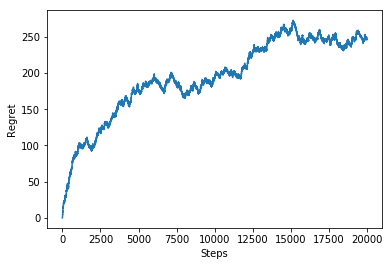

In [5]:
#plot for regret
plt.xlabel('Steps')
plt.ylabel('Regret')
plt.plot(x_axis, regret)

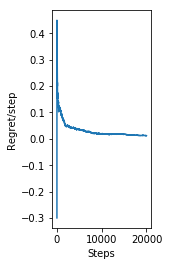

In [7]:
#plot for regret/t
plt.subplot(133)
plt.xlabel('Steps')
plt.ylabel('Regret/step')
plt.plot(x_axis, regret2)